# Ecuaciones Parabólicas.
La ecuacion clasica que estudiamos es la de calor.
Asumimos una dimension.

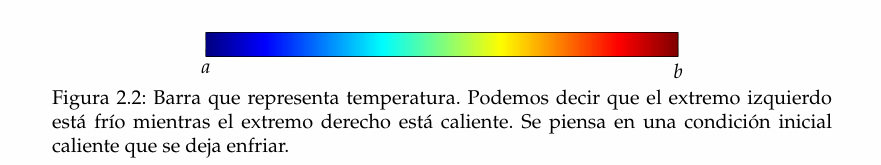

Asumimos una condicion inicial que se pinta en la Figura 2.2. como roja a la derecha (caliente) y azul a la izquierda (fria).
Tambi'en se necesita la temperatura en los bordos. Matematicamente

\begin{eqnarray}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} &=& 0 \\
u(x, t_0=c) &=& I_0(x) \quad , \quad \text{condicion inicial} \\
u(a,t)  &=& h_1(t) \quad  , \quad u(b,t)  = h_2 (t) \quad , \quad \text{condiciones de frontera}
\end{eqnarray}
Aca $\alpha$ se llama **difusividad termica**. Mide la rata de transferencia de calor en el material. $u(x,t)$ es el calor " heat" . Los bordos de la barra son $a,b$ tal como en la Figura 2.2.
Las condiciones en $a,b$ se llaman de **Direchlet**. Vamos a estudiar diferentes tipos (esquemas) de diferencias finitas:

* Hacia adelante (progresivas, o foward in time)
* Hacia atras (regresivas, backward in time)
* promedio (metodo de Crank-Nicholson)
* leapfrog (salto de rana).

## Diferencias finitas hacia adelante en tiempo y centradas en espacio. FTCS.
[FTCS](https://en.wikipedia.org/wiki/FTCS_scheme#:~:text=In%20numerical%20analysis%2C%20the%20FTCS,applied%20to%20the%20heat%20equation.).


La derivada en tiempo de $u$ esta dada por

\begin{eqnarray}
u_t(x_i, t_j) = \frac{w_{i j+1} - w_{ij}}{k} + \mathcal{O}(k)
\end{eqnarray}
con $k = \Delta t$
Ahora la segunda derivada espacial esta dada por

\begin{eqnarray}
u_{xx}(x_i, t_j) = \frac{w_{i+1 \; j} - 2 w_{ij} + w_{i-1 \; j}  }{h^2}
+ \mathcal{O}(h^2).
\end{eqnarray}
recuerde que $h=\Delta x$.
Ahora escribimos la ecuacion

$$\frac{w_{i j+1} - w_{ij}}{k}  - \alpha \frac{w_{i+1 j}- 2 w_{ij} + w_{i-1 \; j}}{h^2} $$
de aproximacion de primer orden en tiempo y segundo en espacio.
Esta es la ecuacion calor **discreta** (en diferencias finitas).

De esta ecuacion vamos a **despejar** $w_{i j+1}$ en t'erminos de los dem'as.
Esto me permite hacer **evolucion**

$$w_{i j+1} = w_{ij} + \frac{\alpha k}{h^2} ( w_{i+1 j} - 2 w_{ij} + w_{i-1 j} ) $$
de otra forma

$$w_{i j+1} = \left ( 1 - 2 \frac{\alpha k}{h^2} \right ) w_{ij} + \frac{\alpha k}{h^2} ( w_{i+1 j} + w_{i-1 j} )  $$
Simplificamos llamando

$$\gamma = \frac{\alpha k}{h^2} $$

$$w_{i j+1} = \left ( 1 - 2 \gamma \right ) w_{ij} + \gamma ( w_{i+1 j} + w_{i-1 j} )  \tag{1} $$

Queremos visitar todos los nodos de la malla. La Figura 2.3 muestra lo que se conoce como **estrella**, **plantilla**, **mol'ecula**.








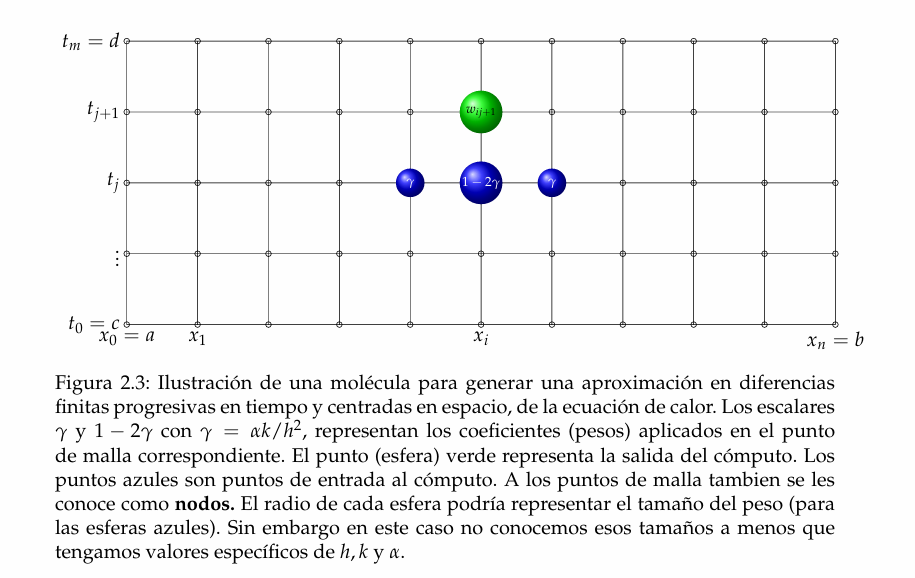

Ya explique como se propaga la informacion desde la condicion inicial hacia adentro (arriba). Si no tuviermos las condiciones de frontera, nos limitariamos en la evaluacion del campo como muestra la Figura 2.4.


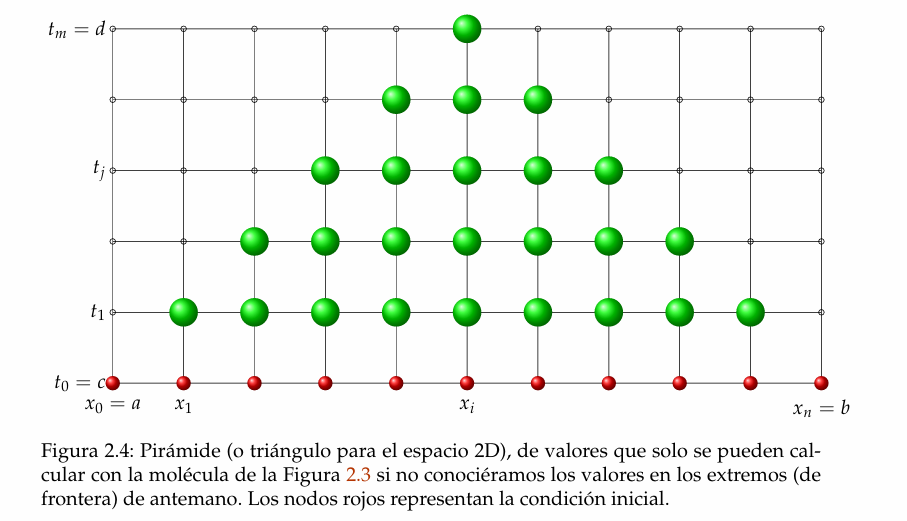

Matematicamente vamos a ver como se propaga el campo a raiz de sus condiciones iniciales y de frontera.


$$w_{i j+1} = \left ( 1 - 2 \gamma \right ) w_{ij} + \gamma ( w_{i+1 j} + w_{i-1 j} ) $$

y con  esta Ecuacion (1) propagar el campo.
Comenzamos con el $t=t_1$.

* $j=0$
$$w_{i 1 } = \left ( 1 - 2 \gamma \right ) w_{i0} + \gamma ( w_{i+1 0} + w_{i-1 0} )  \quad , \quad 0 < i < n \tag{2} $$
$$w_{01} = h_1(t_1) \quad , \quad w_{n1} = h_2(t_1).  $$

* $j=1$
$$w_{i 2 } = \left ( 1 - 2 \gamma \right ) w_{i1} + \gamma ( w_{i+1 1} + w_{i-1 1} )  \quad , \quad 0 < i < n \tag{3} $$
$$w_{02} = h_1(t_2) \quad , \quad w_{n2} = h_2(t_2).  $$

En general
$$w_{i j+1} = \left ( 1 - 2 \gamma \right ) w_{ij} + \gamma ( w_{i+1 j} + w_{i-1 j} ) \quad , \quad 0 < i < n \quad , \quad    0 \le j \le m-1 \tag{4} $$

$$w_{0 j+1} = h_1(t_{j+1}) \quad , \quad w_{n j+1} = h_2(t_{j+1}) \quad , \quad  0 \le j \le m-1.   $$

Reescribimos las ecuacion (4) usando productos internos (punto o matricial)

$$ w_{i j+1} = ( \gamma \quad 1-2 \gamma \quad \gamma)
\begin{pmatrix}
w_{i-1 j} \\ w_{ij} \\ w_{i+1 j}
\end{pmatrix}  \quad 0 < i < n , \quad 0 \le j \le m-1$$

$$w_{0 j+1} = h_1(t_{j+1}) \quad , \quad w_{n j+1} = h_2(t_{j+1}) \quad , \quad  0 \le j \le m-1.   $$

Vamos a examinar las ecuaciones con $i=1,2,3, \cdots , n-1$.

* $i=1$
$$ w_{1 j+1} = ( \gamma \quad 1-2 \gamma \quad \gamma)
\begin{pmatrix}
w_{0 j} \\ w_{1j} \\ w_{2 j}  
\end{pmatrix} = (1 - 2 \gamma \quad \gamma ) \binom{w_{1j}}{w_{2j}} + \gamma w_{0j} $$

* $i=2$
$$ w_{2 j+1} = ( \gamma \quad 1-2 \gamma \quad \gamma)
\begin{pmatrix}
w_{1 j} \\ w_{2j} \\ w_{3 j}
\end{pmatrix}  $$

* $\vdots$

* $i=n-1$.

$$ w_{n-2 j+1} = ( \gamma \quad 1-2 \gamma \quad \gamma)
\begin{pmatrix}
w_{n-2 j} \\ w_{n-1 j} \\ w_{n j}
\end{pmatrix}
= (\gamma \quad 1 - 2 \gamma) \binom{w_{n-2 j}}{w_{n-1} j} + \gamma w_{nj} $$


Este sistema produce la siguiente ecuacion matricial.

$$
\begin{pmatrix}
w_{1 j+1} \\ w_{2 j+1} \\ \vdots \\ w_{n-2 j+1} \\ w_{n-1 j+1} \\
\end{pmatrix}
=
\begin{pmatrix}
1 -2 \gamma & \gamma & 0 & \cdots & 0  \\
\gamma & 1 - 2 \gamma & \gamma & \ddots & \vdots   \\
0 & \ddots & \ddots & \ddots & 0  \\
\vdots & \ddots & \gamma & 1 - 2 \gamma & \gamma \\
0 & \cdots & 0 & \gamma & 1  - 2 \gamma
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\ w_{2j} \\ \vdots \\ w_{n-2 j} \\ w_{n-1 j}
\end{pmatrix}
+ \gamma
\begin{pmatrix}
w_{0j} \\ 0 \\ \vdots \\ 0 \\ w_{nj}
\end{pmatrix}
$$



Recuerde que esta ecuacion es de la forma

$$\mathbf{x}_{j+1} = T \mathbf{x}_j +\mathbf{c} $$

Lo podemos ver como

$$w_{j+1} + A w_j + c \tag{5} $$
donde

$$
A =
\begin{pmatrix}
1 -2 \gamma & \gamma & 0 & \cdots & 0  \\
\gamma & 1 - 2 \gamma & \gamma & \ddots & \vdots   \\
0 & \ddots & \ddots & \ddots & 0  \\
\vdots & \ddots & \gamma & 1 - 2 \gamma & \gamma \\
0 & \cdots & 0 & \gamma & 1  - 2 \gamma
\end{pmatrix}
$$
y el vector $c$
$$c=  \gamma
\begin{pmatrix}
w_{0j} \\ 0 \\ \vdots \\ 0 \\ w_{nj}
\end{pmatrix} $$



## Analisis de estabilidad
Queremos saber bajo que condiciones el sistema (5) converge.
Vamos a estudiar dos metodos

1. Matricial
1. Metodo de von Neumann.

### M'etodo matricial.
Recuerde que el problema de la Ecuacion (5) converge si $\rho(A) < 1$.

Lo importante es estudiar como se propagan los errores. Pensamos en que por ejemplo las condiciones iniciales tienen un error (de adquisicion de datos).

$$e_0 = u_0 - w_0 $$
Veamos como este error de frontera se propaga cuando nos movemos al interior de la malla


$w_0 = u_0 - e_0$

\begin{eqnarray}
w_1 &=& A w_0 + c = A u_0 - A e_0 + c \\
w_2 &=& A w_1 + c = A^2 u_0 - A^2 e_0 + Ac + c \\
&\vdots& \\
w_{j+1} &=& A^{j+1} u_0 - A^{j+1} e_0 + \sum_{i=1}^j A^i c.
\end{eqnarray}

El error se puede propagar. Considere el termino del error en esta ecuacion
y tome magnitudes

$$\| A^{j+1} e_0 \|  \le \| e_0 \| $$
Pero

$$\| A^{j+1} e_0 \| \le \| A^{j+1} \| \| e_0 \|. $$

Necesitamos entonces que $\| A^{j+1} \|< 1$ es decir
$\| A \| < 1$. Si $\rho(A) < 1$ esta bien.

Volemos a las 3:40. Para estudiar bajo que condiciones se cumple esta hipotesis.

Del apendice C, la Ecuacion C.15 dice que los autovalores de la matriz $A_{n \times n}$ con tridiagonal $a,b,c$, $c=b=\gamma$, $a=1-2 \gamma$.
son

$$\lambda_j = a - 2 \sqrt{bc}  \cos \frac{j \pi}{n+1} \quad , \quad j=1,2, \cdots, n$$
Entonces

$$\lambda_j = (1 - 2 \gamma) - 2 \gamma \cos \frac{j \pi}{n+1} \quad , \quad j=1,2, \cdots, n$$
 Queremos que $| \lambda_j | < 1$.
Entonces

$$ | \lambda_j  | = \left | (1 - 2 \gamma) - 2 \gamma \cos \frac{j \pi}{n+1} \right  | < 1$$

$$  (1 - 2 \gamma) - 2 \gamma \cos \frac{j \pi}{n+1} = 1 - 2 \gamma \left (  1 + \cos \frac{ j \pi}{n+1} \right ) = 1 - 4 \gamma  \cos^2 \frac{ j \pi}{2(n+1)}$$

Queremos

$$ \left |  1 - 4 \gamma  \cos^2 \frac{ j \pi}{2(n+1)}  \right | < 1 $$

$$ -1 <   4 \gamma  \cos^2 \frac{ j \pi}{2(n+1)} - 1  < 1 $$

Sumano 1
$$ 0 <   4 \gamma  \cos^2 \frac{ j \pi}{2(n+1)} < 2 $$
De donde

$$ \gamma \cos^2 \frac{j \pi}{2 ( n+1)} < \frac12$$
Como el coseno se puede acercar a 1 tanto como quiere
debemos tener que

$$\gamma < \frac12 $$
Recuerde que $\gamma = \alpha k/h^2$

entonces
$$k < \frac{h^2}{2 \alpha} $$
Vamos a usar la siguiente notacion

\begin{eqnarray}
dx = h \quad , \quad \text{tamanho de muestra en espacio} \\
dt = k \quad  , \quad \text{tamanho de muestra en tiempo} \\
nx  \quad , \quad \text{numero de muestras en espacio} \\
nt  \quad , \quad \text{numero de muestras en tiempo} \\
\end{eqnarray}
Con estos terminos debemos escoger $dt$ de forma que

$$dt < \frac{(dx)^2}{2 \alpha}  $$

### Metodo de von Neumann.
La idea esta basada en un trabajo de Crank Nicholson (referencia en las notas de clase). Para esto se analiza la solucion usando separacion de variables y los terminos que inciden en las series de Fourier que representan la solucion.

Asumamos promier que el error en la celda $ij$ esta dado por

$$\epsilon_{ij} = w_{ij} - W_{ij} $$
donde $W_{ij}$ es la souci'on del sistem  (4) con errores de redondeo.
Es decir $w_{ij} = \epsilon_{ij} + W_{ij}$
entonces





$$w_{i j+1} = \left ( 1 - 2 \gamma \right ) w_{ij} + \gamma ( w_{i+1 j} + w_{i-1 j} ) $$

$$e_{i j+1} + W_{i j+1} = \left ( 1 - 2 \gamma \right ) (\epsilon_{ij} + W_{ij}) + \gamma ( \epsilon_{i+1 j} W_{i+1 j} + \epsilon_{i-1 j} + W_{i-1 j} ) $$

Como asumimos que $W_{ij}$ resuelve la Ecuacion (4).

$$\epsilon_{i j+1} = (1 - 2 \gamma) \epsilon_{ij} + \gamma( \epsilon_{i+1 j} + \epsilon_{i-1 j}) $$
Tambien cumple la misma ecuacion.

Donde viene Fourier? Fourier dice que la solucion del sistema es una superposicion de soluciones

$$u_m( x, t) = K \mathrm{e}^{\alpha t} \mathrm{e}^{\mathrm{i} k_m x}  $$

Insertamos esta Ecuacion en la Ecuacion

$$w_{i j+1} = \left ( 1 - 2 \gamma \right ) w_{ij} + \gamma ( w_{i+1 j} + w_{i-1 j} ) $$

$$K \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i}  =  (1 - 2 \gamma) K \mathrm{e}^{\alpha t_i} \mathrm{e}^{\mathrm{i} k x_i} + K
\gamma ( \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} x_{i+1}} + \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} x_{i-1}})   $$

Cancelamos $K$
$$ \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i}  =  (1 - 2 \gamma)  \mathrm{e}^{\alpha t_i} \mathrm{e}^{\mathrm{i} k x_i} +
\gamma ( \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} x_{i+1}} + \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} x_{i-1}})   $$

Ahora bien el resultado de dividir la solución en el tiempo $t_{j+1}$ por
la solución en el tiempo $t_j$ es

$$\frac{K \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i} }
{K \mathrm{e}^{\alpha t_{j}} \mathrm{e}^{\mathrm{i} k x_i}  } =
\mathrm{e}^{\alpha \Delta t}$$


El resultado es

\begin{eqnarray}
\mathrm{e}^{\alpha \Delta t} &=& (1 - 2 \gamma) + \gamma( \mathrm{e}^{\mathrm{i} \Delta x}  + \mathrm{e}^{-\mathrm{i} \Delta x}) \\
&=& (1 - 2 \gamma) + 2 \gamma \cos k \Delta x \\
&=& 1 - 2 \gamma ( 1 - \cos k \Delta x) \\
&=& 1 - 4 \gamma \left (  \sin^2 \frac{k \Delta x}{2}  \right )
\end{eqnarray}





Con el mismo razocinio del metodo de matrices encontramos que

$$\gamma < \frac12 $$
para estabilidad.

Hay otras herramientas para estabilidad
* Analisis de equivalencia Lax: Relaciona estabilidad con convergencia
* Analisis de energia: Verifica estabilidad con normas de energia.
Estos dos metodos estan por fuera del alcance de este curso.

**Ejemplo 2.3.1**: Halle la soluci'on num'erica de la siguiente ecuacion de calor y compare con la solucion analitica (que la mostramos enseguida).
Estudie la estabilidad del sistema (use `Python`).

\begin{eqnarray}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} &=& 0
 \quad , \quad \text{ecuacion diferencial de calor} \\
 u(x,0) &=& f(x) \quad  , \quad \text{condicion inicial} \\
 u(0,t) &=& 0 \quad , u(L,t) = 0  \quad , \quad \text{condiciones de frontera}  \\
 f(x) &=& 6 \sin \left (  \frac{\pi x}{L}\right )
\end{eqnarray}
La solucion, usando el m'etodo de separacion de variables es

$$u(x,t) = 6 \sin \left (  \frac{\pi x}{L} \right ) \mathrm{e}^{-\frac{1}{\alpha} \left ( \frac{\pi}{L} \right )^2 t}  $$


Asuma $L=1$, $\alpha=1$.



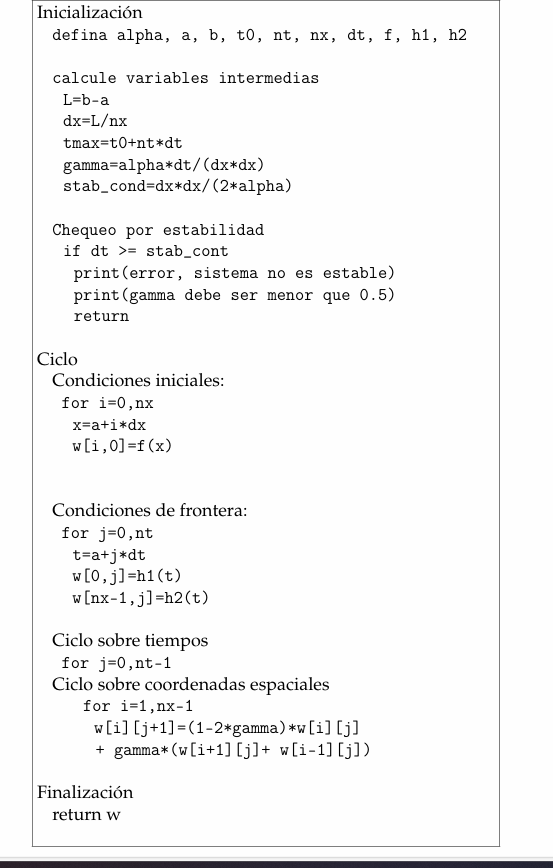

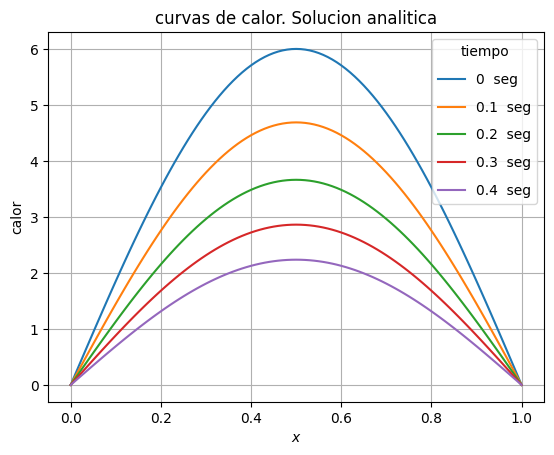

In [ ]:
# Solucion analitica
import numpy as np
import matplotlib.pyplot as plt

alpha=1
a=0
b=1
nx=101
X = np.linspace(a,b,nx)
L=b-a

def u(x,t):
    return 6*np.exp(-(1/alpha)*(np.pi/2)**2* t)*np.sin(np.pi*x/L)


# tiempos
t0=0
dt=0.1
t=t0

params = {'legend.fontsize':5, 'legned.handlength':1}

# labels
plt.xlabel(r"$x$")
plt.ylabel(r"calor")
plt.title(r"curvas de calor. Solucion analitica")

nP=5
for i in range(nP):
    plt.plot(X, u(X,t), label=str(round(t,1)) +   '  seg')
    plt.legend(labelspacing=1, title='tiempo')
    t += dt

plt.grid(True)
plt.show()

# Proxima clase: solucion numerica, comparar para error, estabilidad, etc.